In [1]:
from PIL import Image
import requests
import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pyocr

In [2]:
def openImg(url):
    pil_img = Image.open(io.BytesIO(requests.get(url).content))
    pil_img = pil_img.convert('RGB')
    np_img = np.array(pil_img)
    return np_img

In [3]:
def bubble_sort(arr):
    # ただのソート
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i].distance > arr[i + 1].distance:
                arr[i].distance, arr[i + 1].distance = arr[i + 1].distance, arr[i].distance
                change = True
    return arr

In [50]:
def get_distance(x1, y1, x2, y2):
    # 二点間の距離を三平方の定理で求める
    d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return d

42.88558829039611 10.929477751638968


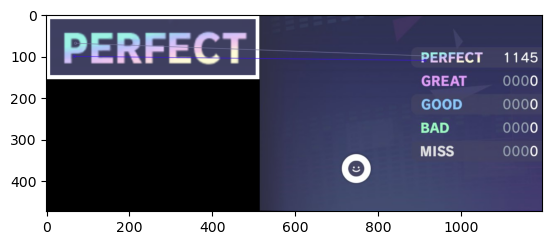

In [57]:
def match(from_img, to_img):
    akaze = cv2.SIFT_create()
    
    # 各画像の特徴点を取る
    from_key_points, from_descriptions = akaze.detectAndCompute(from_img, None)
    to_key_points, to_descriptions = akaze.detectAndCompute(to_img, None)
    
    # 2つの特徴点をマッチさせる
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(from_descriptions, to_descriptions, k=2)

    ratio = 0.5
    good = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good.append(m)

    good = bubble_sort(good)

    good2 = []

    for i in good:
        if len(good2) > 1:
            break
        good2.append([i])
    
    # 特徴点を同士をつなぐ
    img4 = cv2.drawMatchesKnn(from_img, from_key_points, to_img, to_key_points, good2, None, flags=2)

    from_dis = get_distance(from_key_points[good2[0][0].trainIdx].pt[0], from_key_points[good2[0][0].trainIdx].pt[1], from_key_points[good2[1][0].trainIdx].pt[0], from_key_points[good2[1][0].trainIdx].pt[1])
    to_dis = get_distance(to_key_points[good2[0][0].trainIdx].pt[0], to_key_points[good2[0][0].trainIdx].pt[1], to_key_points[good2[1][0].trainIdx].pt[0], to_key_points[good2[1][0].trainIdx].pt[1])

    print(from_dis, to_dis)

    to_img2 = cv2.resize(to_img, None, None, 1 / (to_dis / from_dis), 1 / (to_dis / from_dis))

    plt.imshow(to_img2)
    
    return img4

from_img = cv2.cvtColor(cv2.imread('./template.png'), cv2.COLOR_BGR2RGB)
to_img = openImg("https://raw.githubusercontent.com/result-database/ocr-api-v3-notebook/main/wide1.jpg")
to_img = to_img[to_img.shape[0] // 2:to_img.shape[0], 0:to_img.shape[1] // 3]

img = match(from_img=from_img, to_img=to_img)

plt.imshow(img)